# Student Performace Indicator 
## Life Cycle of the Project 
### .Understanding then problem 
### .Data Collection
### .Data checks to perform
### .Exploratory analysis
### .Data Preprocessing 
### .Model Training 
### .choose best model


### 1) Understanding the problem 
This project understands how the students performance (test score) is affected by the other variable like gender ethnicity parental level of education,lunch and test preparation course


### 2) Data Collection
. Data Source : https://www.kaggle.com/code/spscientist/student-performance-in-exams/input 

### Import required packages and data 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df= pd.read_csv('Data/Students.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

### Dataset Information
. gender : sex of students -> (Male/female);

.race/ethnicity : ethnicity of students -> (Group A, B,C, D,E);

.parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school);

.lunch : having lunch before test (standard or free/reduced);

.test preparation course : complete or not complete before test;

.maths score

.reading score

.writing score



### Data Checks

. Check the missing value

. Check of duplicate value

. Check for data type

. Check the number of unique values of each coloumn

. Check the statistic of Data set

. Check various categories present in the different categorical coloumn 




### Check the Missing Values


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Check for duplicate values

In [7]:
df.duplicated().sum()

0

#### No duplicate values has been found 


### check Information the dataset 

In [8]:
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

### checking the statistics of the dataset 

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
print("Categories in gender variable : ", end="")
print(df['gender'].unique())

print("Categories in Race/ethnicity variable : ", end="")
print(df['race/ethnicity'].unique())

print("Categories in parental level of education variable : ", end="")
print(df['parental level of education'].unique())

print("Categories in lunch variable : ", end="")
print(df['lunch'].unique())

print("Categories in test preparation course variable : ", end="")
print(df['test preparation course'].unique())


Categories in gender variable : ['female' 'male']
Categories in Race/ethnicity variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable : ['standard' 'free/reduced']
Categories in test preparation course variable : ['none' 'completed']


### Adding coloumns for  total score and average score 

In [28]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
df['Total_score'] = df['math score'] + df['reading score'] + df['writing score']


In [30]:
df['Average_score'] = df['Total_score'] /3

In [31]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Data Visualization 

#### Visualize average score distribution to make some conclusion 

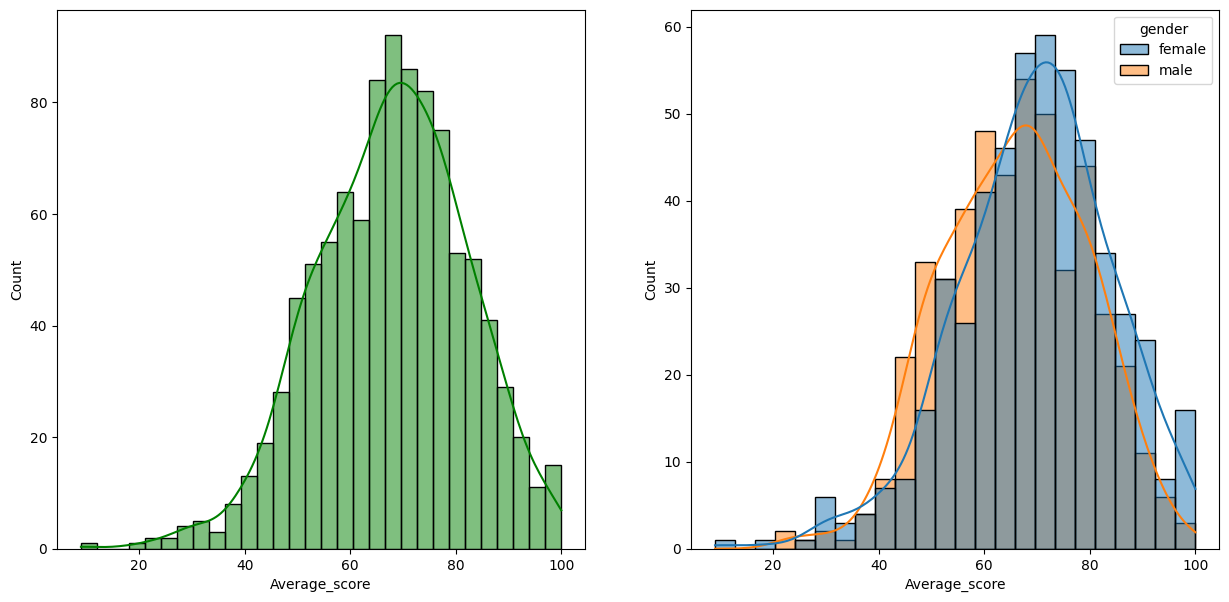

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(df,x='Average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(df,x='Average_score',kde=True,hue='gender')
plt.show()

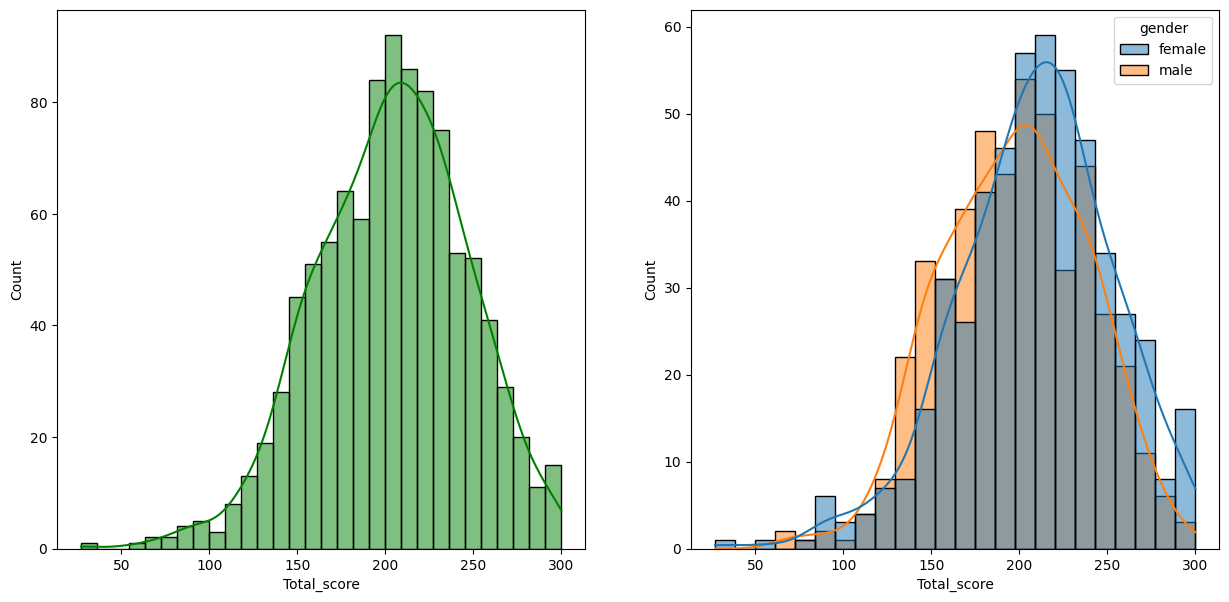

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(df,x='Total_score',kde=True,hue='gender')
plt.show()

#### Insights 
Female Students tends to perform better than the male students 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15580\2619871910.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15580\2619871910.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15580\2619871910.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


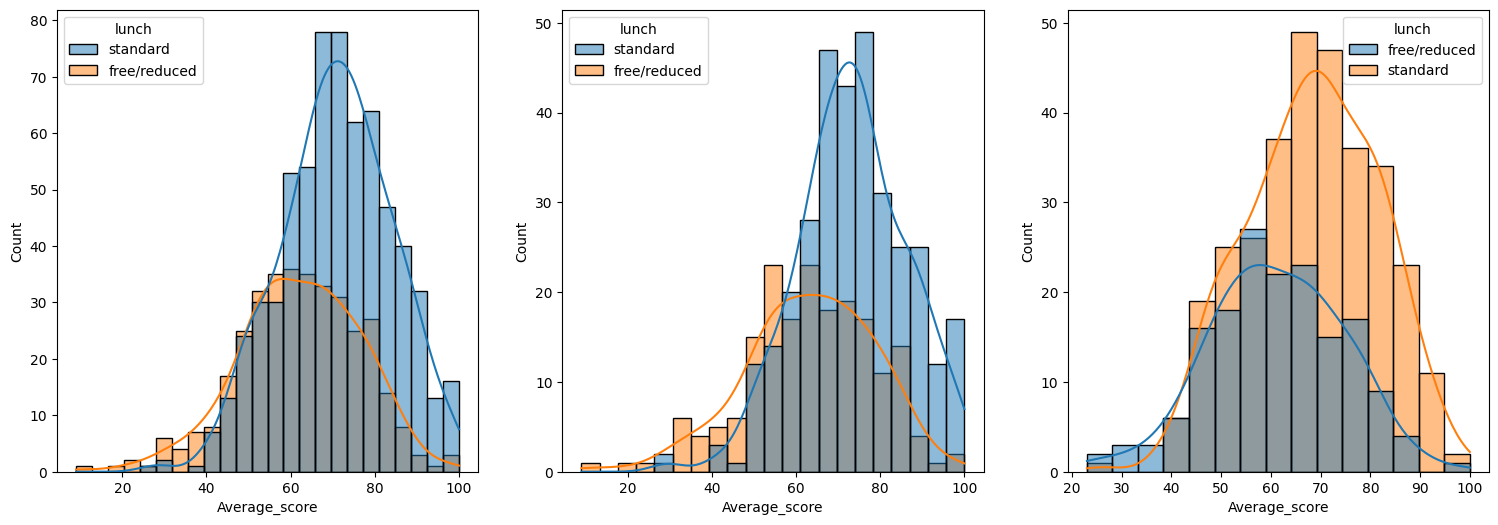

In [40]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(df,x='Average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(df[df.gender=='female'],x='Average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(df[df.gender=='male'],x='Average_score',kde=True,hue='lunch')
plt.show()

#### Insights 

. Standard lunch helps to perform well in exam 
. Standard lunch helps to perform well for male and female 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15580\1816854676.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15580\1816854676.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15580\1816854676.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


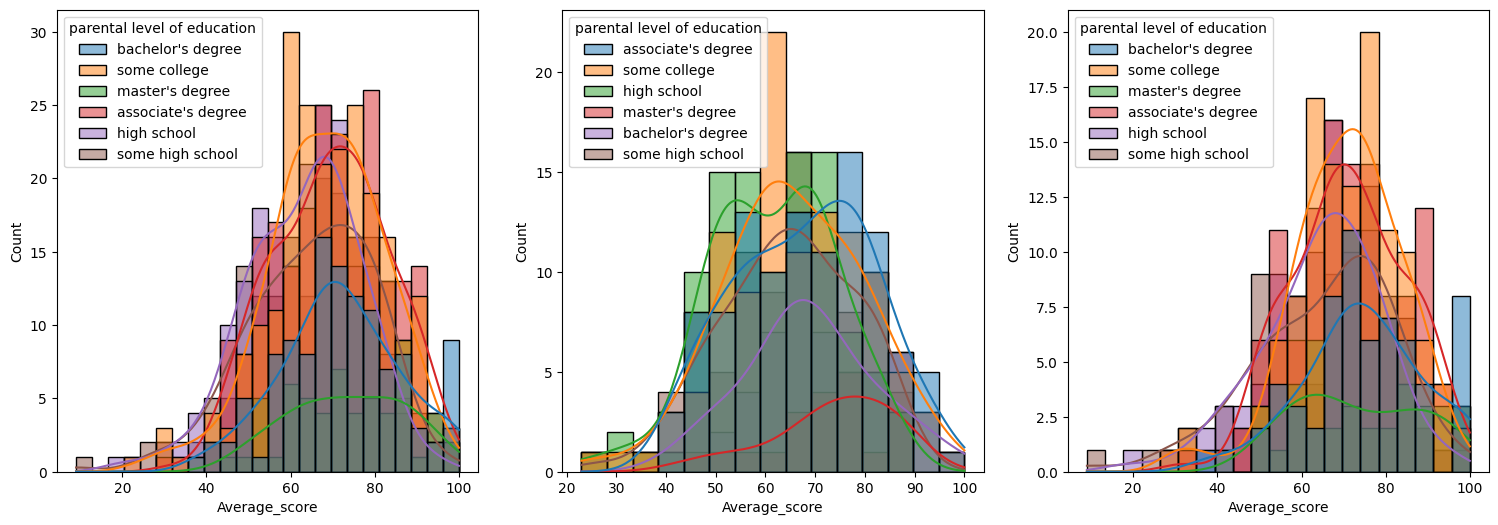

In [41]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average_score',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='parental level of education')
plt.show()